# **1. Installing Dependencies**

# 1.1 Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

# 1.2 Installing our dependencies

**Note**: While installing dependencies it will prompt to restart runtime, don't worry just restart it and only run the above **1.1 Mounting google drive** cell.

In [ ]:
# Download YOLOv7 repository and install requirements

%cd /content/gdrive/MyDrive
!git clone https://github.com/augmentedstartups/yolov7.git
%cd yolov7
!pip install -r requirements.txt
!pip install roboflow

# **2. Getting Our Dataset**

If you haven't followed the link to dataset given in description, here it is again [Trash Dataset](https://roboflow.com/as-waste)

- Follow the link and sign in to your Roboflow account. If you haven't signed up before, first sign up and then sign in
- Once you are login, click the **Download this Dataset** tab in the top right corner
- A dialogue box will open, select the YOLOv7 format, check the **Show download code** option and press continue.
- A download code will appear

In [ ]:
%cd /content/gdrive/MyDrive/yolov7

#### ROBOFLOW DATASET DOWNLOAD CODE #####

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="fFh87BtvajzkKKAbHnKs")
project = rf.workspace("pendulum").project("ccprime")
version = project.version(2)
dataset = version.download("yolov7")

# **3. Run YOLOv7 Training**

# 3.1 Getting our pretrained model, you can choose any model from below to fine-tune

**Uncomment the model you want to finetune**

There are five available model, uncomment the one which you want to train. For this we will be finetuning **yolov7.pt** model

In [ ]:
%cd /content/gdrive/MyDrive/yolov7

/content/gdrive/MyDrive/yolov7


In [ ]:
%%bash
#wget -P /content/gdrive/MyDrive/yolov7 https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt
#wget -P /content/gdrive/MyDrive/yolov7 https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7x.pt
# wget -P /content/gdrive/MyDrive/yolov7 https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-w6.pt
# wget -P /content/gdrive/MyDrive/yolov7 https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-e6.pt
# wget -P /content/gdrive/MyDrive/yolov7 https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-d6.pt
wget -P /content/gdrive/MyDrive/yolov7 https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-e6e.pt

# 3.2 Start Training

**Note**

[To get the full list of training arguments follow the link](https://github.com/WongKinYiu/yolov7/blob/main/train.py)

Some important arguments to know
- **configuration**: In the main yolov7 folder go to cfg/training folder and select the path of appropriate configuration file. Give the relative path to the file in **--cfg** argument
- **data** the path to data folder, it will be automatically catered
- **weights** path to pretrained weights given by **--weights** argument


<br><br>

**Note for resuming training from checkpoint** <br>
By default, the checkpoints for the epoch are stored in folder, yolov7/runs/train, give the relative path to last epoch checkpoints

In [ ]:
%cd /content/gdrive/MyDrive/yolov7
!python train.py --batch 16 --cfg cfg/training/yolov7.yaml --epochs 55 --data {dataset.location}/data.yaml --weights 'yolov7-e6e.pt' --device 0

/content/gdrive/MyDrive/yolov7
2024-04-22 18:29:45.895637: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-22 18:29:45.895684: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-22 18:29:45.961165: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-22 18:29:45.974768: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-22 18:

[link text](https://)# **4. Evaluation**

- Note the checkpoints from training will be stored by default in runs/train/exp. Take the path of the latest checkpoint

We can evaluate the performance of our custom training using the provided evalution script.

Note we can adjust the below custom arguments. For details, see [the arguments accepted by detect.py](https://github.com/WongKinYiu/yolov7/blob/main/detect.py#L154).

# 4.1 F1 and Precision Recall Curve

In [ ]:
from IPython.display import Image
display(Image("/content/gdrive/MyDrive/yolov7/runs/train/exp/F1_curve.png", width=400, height=400))
display(Image("/content/gdrive/MyDrive/yolov7/runs/train/exp/PR_curve.png", width=400, height=400))
display(Image("/content/gdrive/MyDrive/yolov7/runs/train/exp/confusion_matrix.png", width=500, height=500))

FileNotFoundError: No such file or directory: '/content/gdrive/MyDrive/yolov7/runs/train/exp/F1_curve.png'

FileNotFoundError: No such file or directory: '/content/gdrive/MyDrive/yolov7/runs/train/exp/F1_curve.png'

<IPython.core.display.Image object>

FileNotFoundError: No such file or directory: '/content/gdrive/MyDrive/yolov7/runs/train/exp/PR_curve.png'

FileNotFoundError: No such file or directory: '/content/gdrive/MyDrive/yolov7/runs/train/exp/PR_curve.png'

<IPython.core.display.Image object>

FileNotFoundError: No such file or directory: '/content/gdrive/MyDrive/yolov7/runs/train/exp/confusion_matrix.png'

FileNotFoundError: No such file or directory: '/content/gdrive/MyDrive/yolov7/runs/train/exp/confusion_matrix.png'

<IPython.core.display.Image object>

# 5.1.1 Run the below cell to evaluate on test images

In [ ]:
# Run evaluation
!python detect.py --weights /content/gdrive/MyDrive/yolov7/runs/train/exp8/weights/epoch_054.pt --conf 0.1 --source /content/gdrive/MyDrive/yolov7/ccprime-2/test/images

# 5.1.2 Display Inference on Folder of Test Images

**Note** From the above output display copy the full path of folder where test images are stored

In [ ]:
from PIL import Image

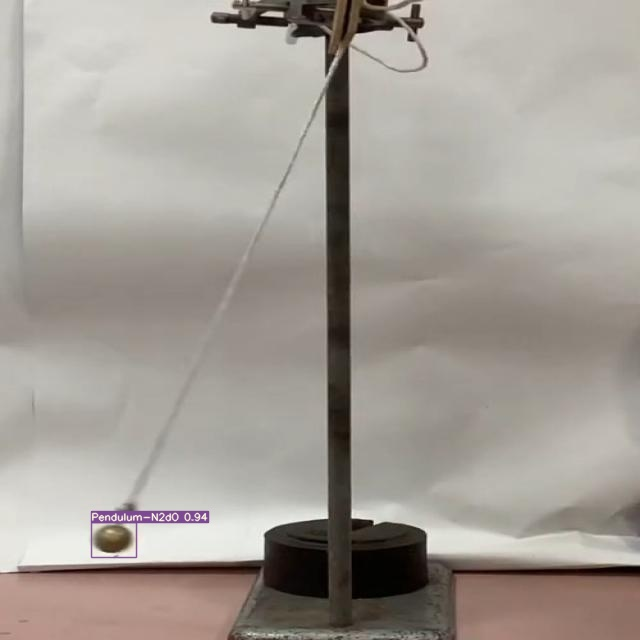

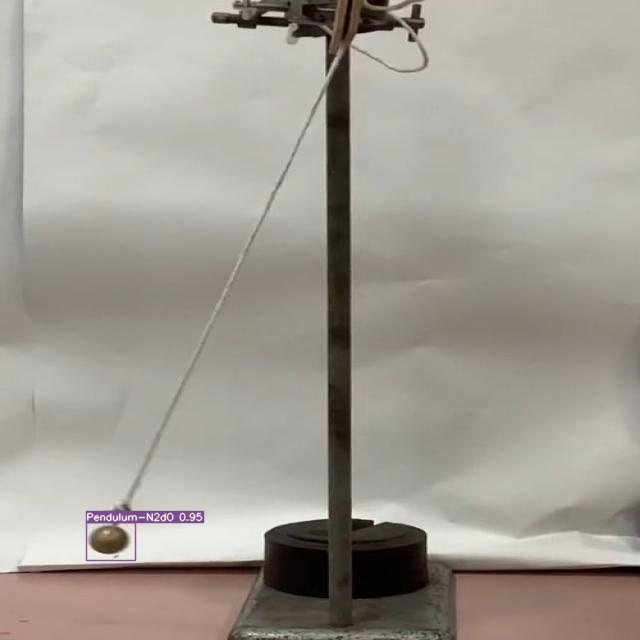

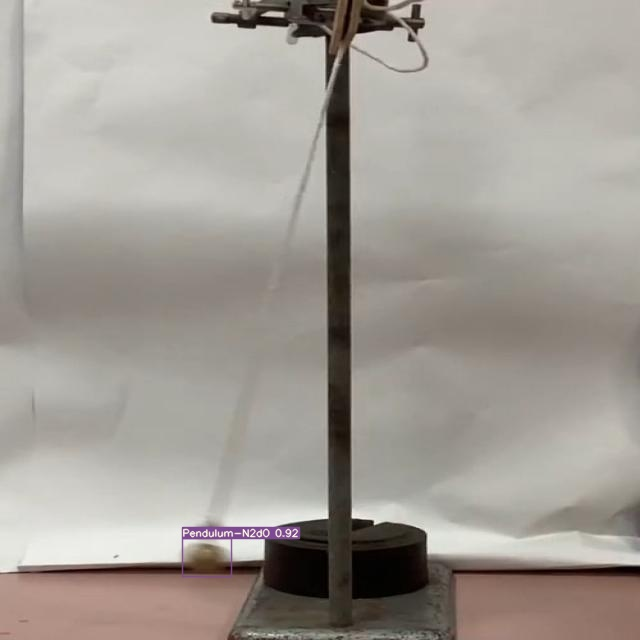

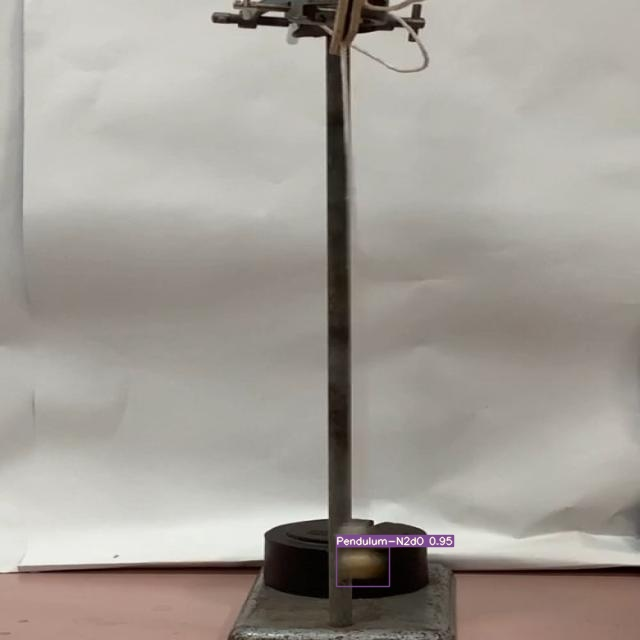

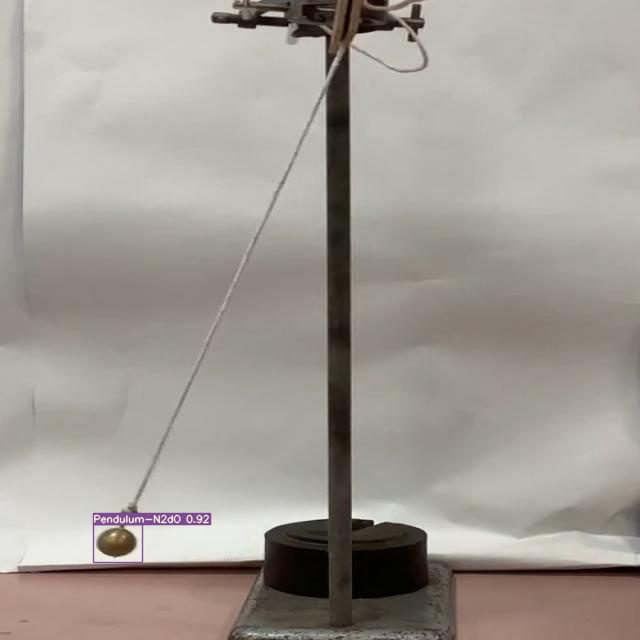

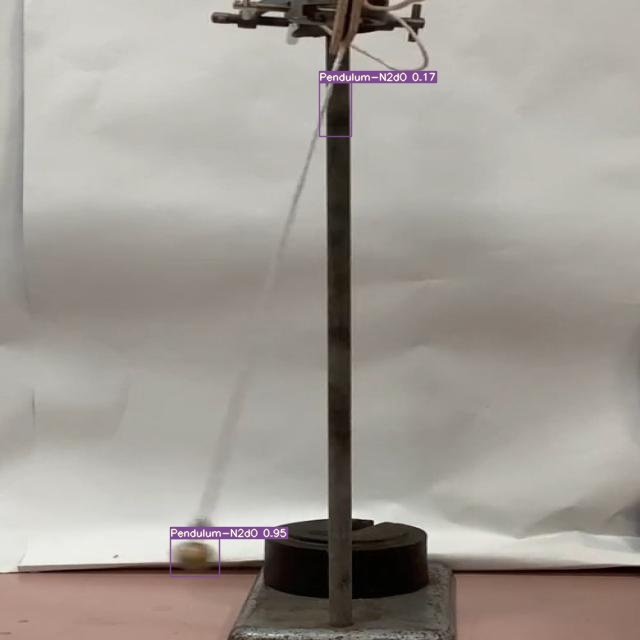

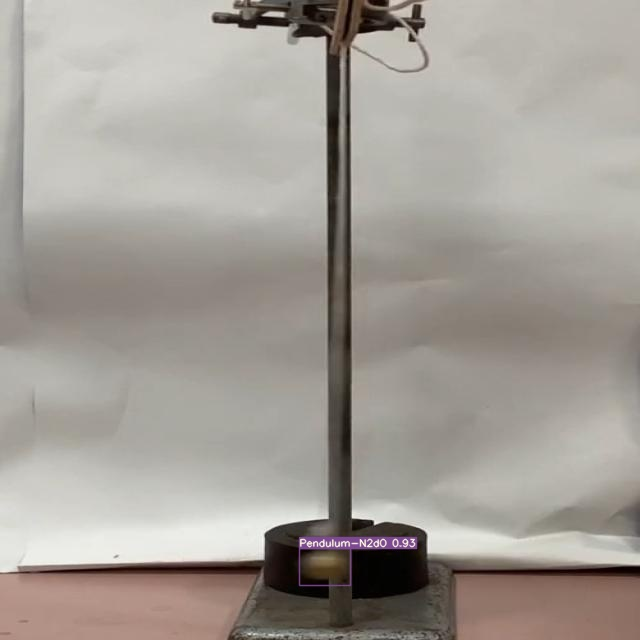

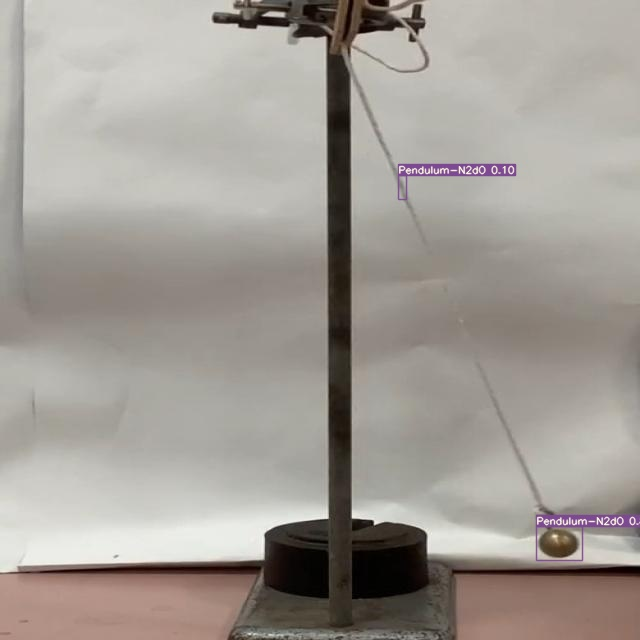

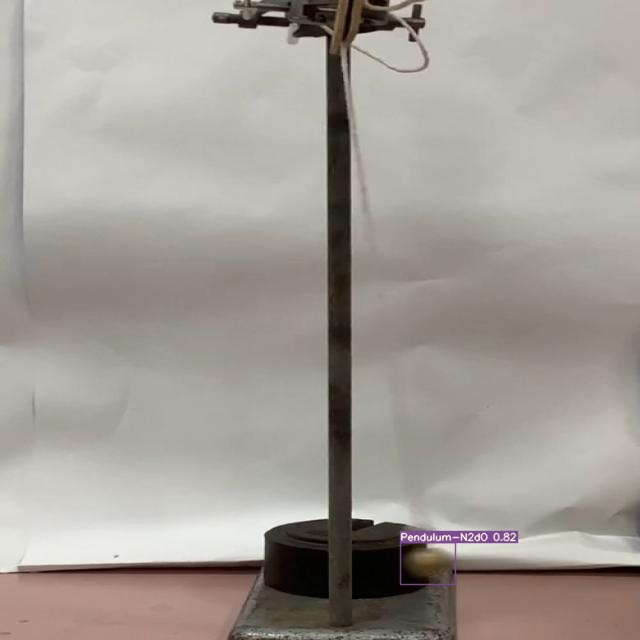

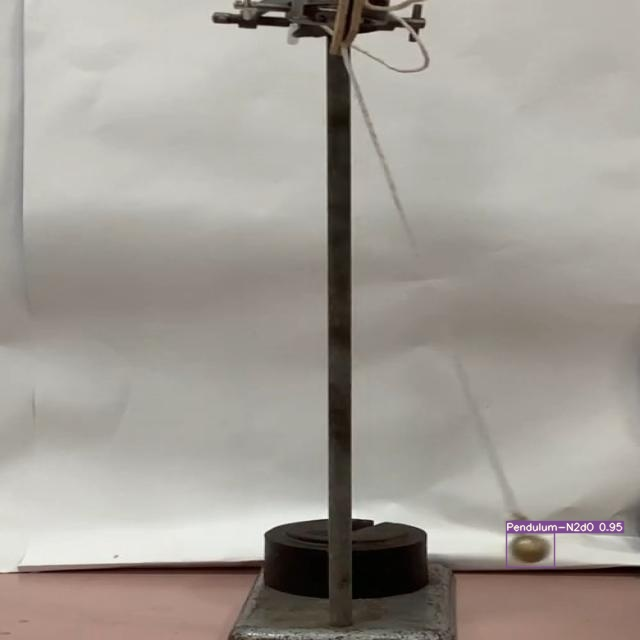

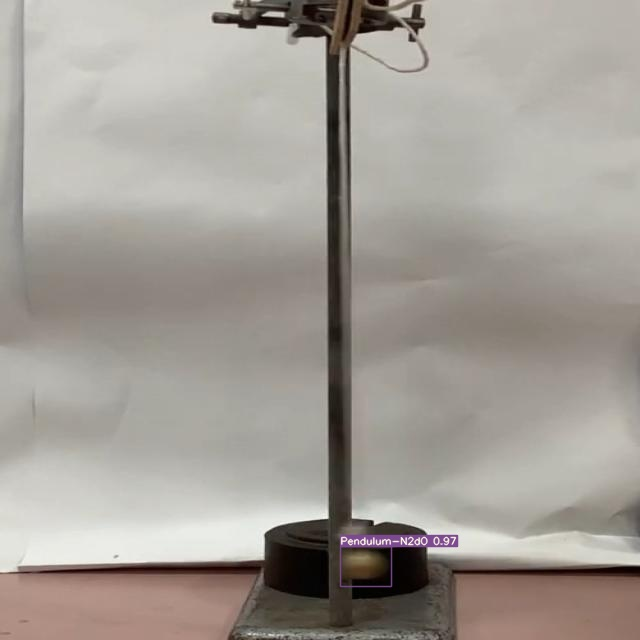

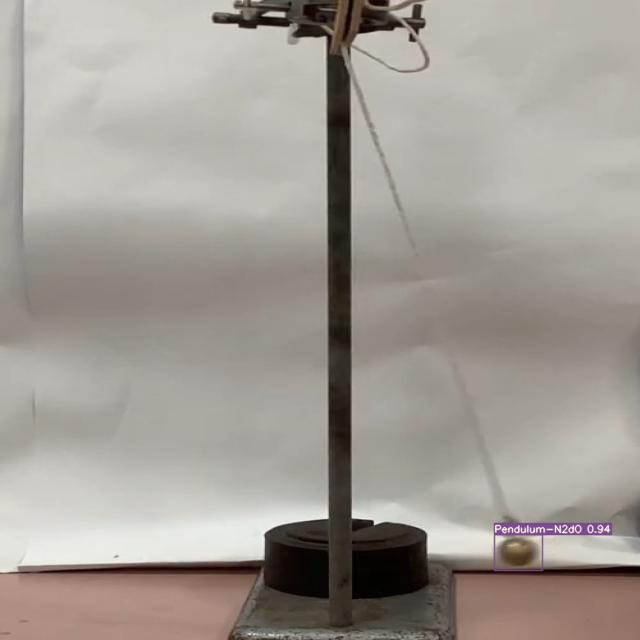

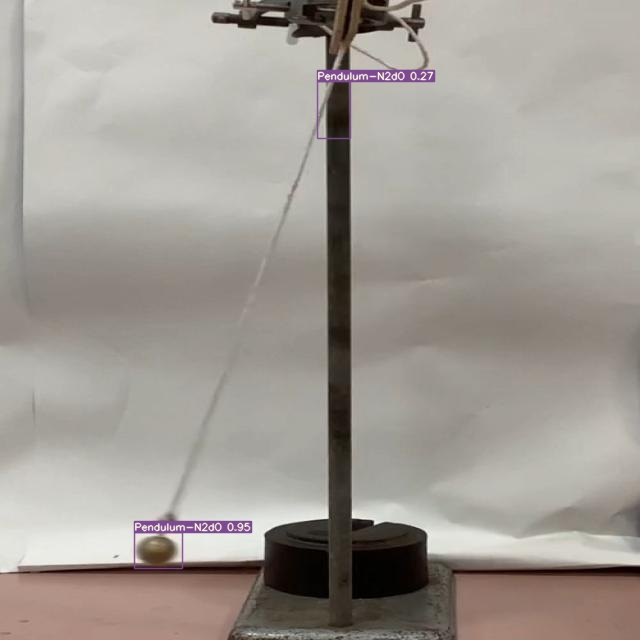

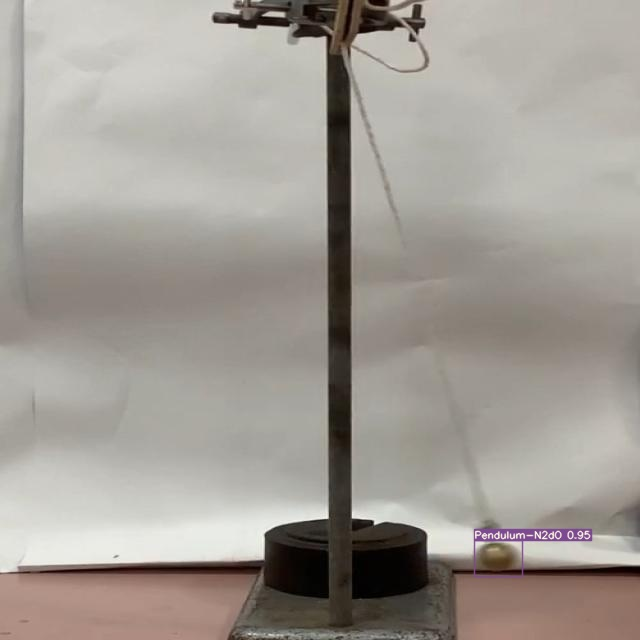

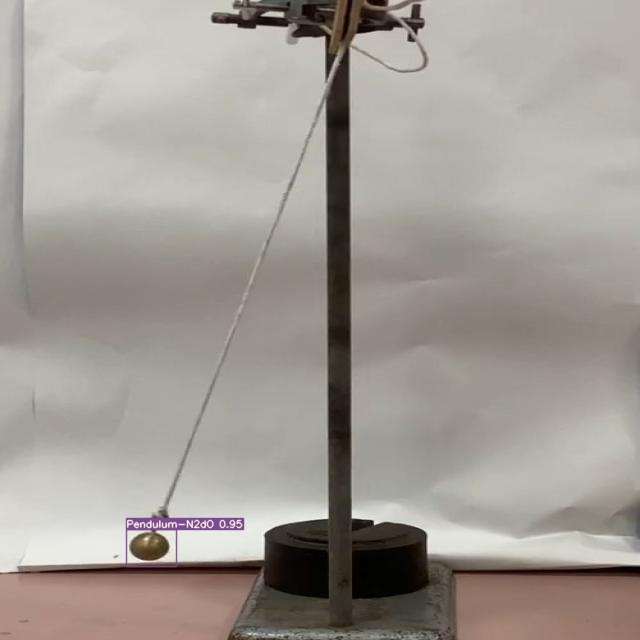

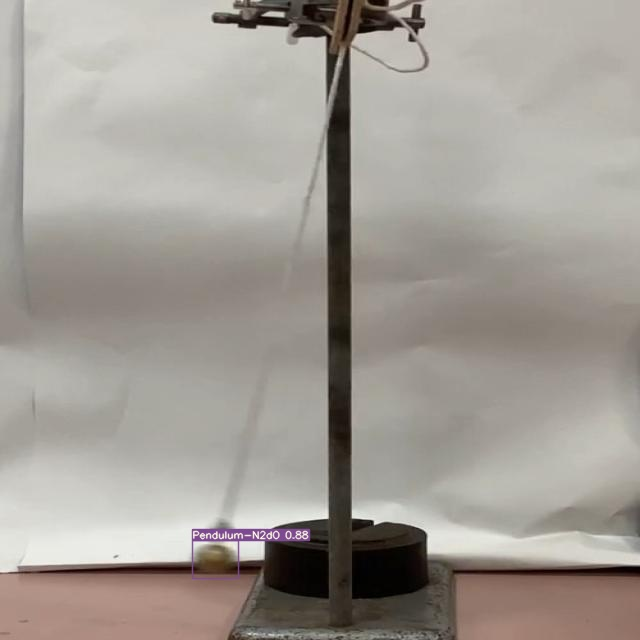

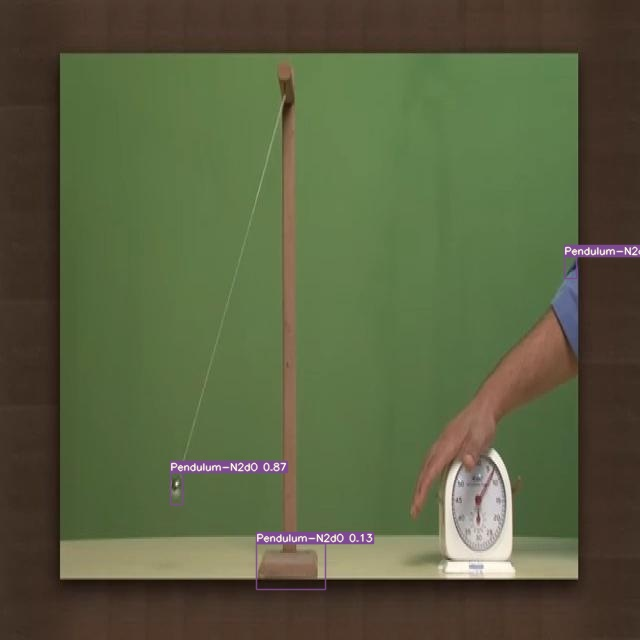

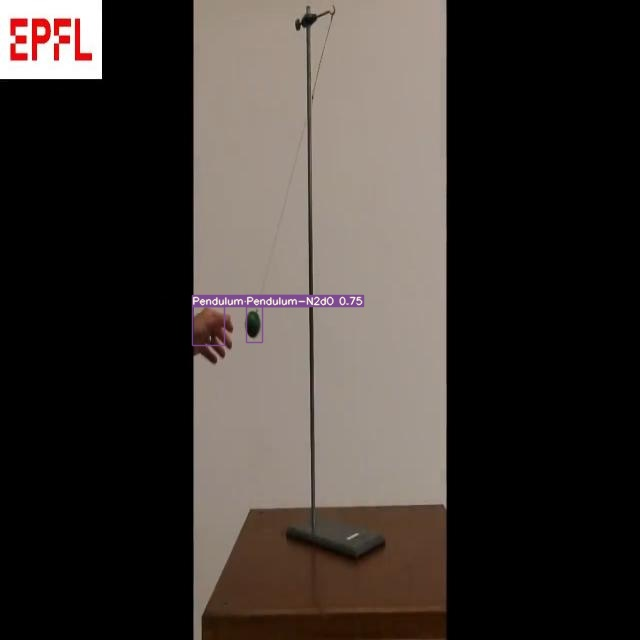

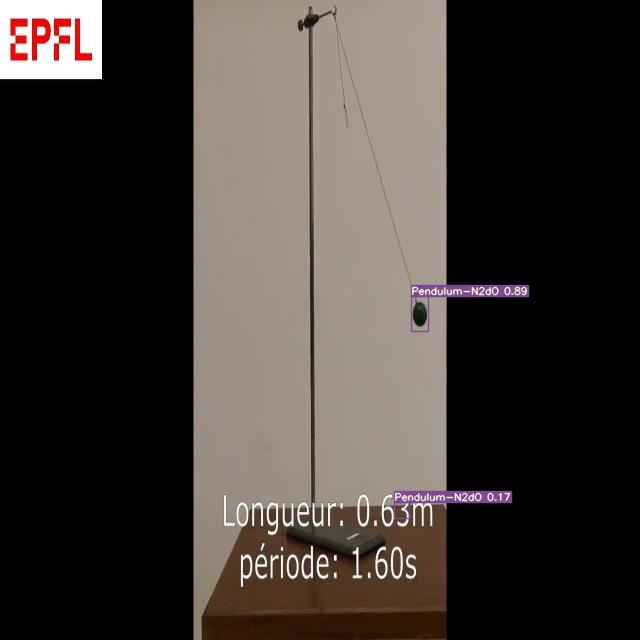

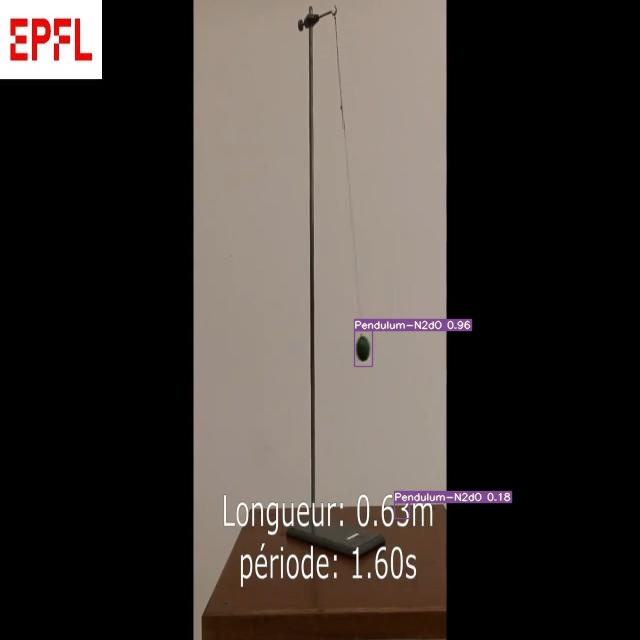

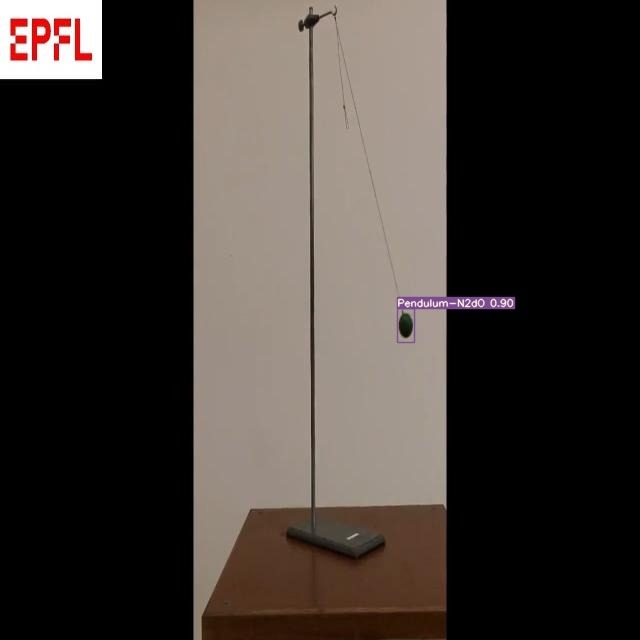

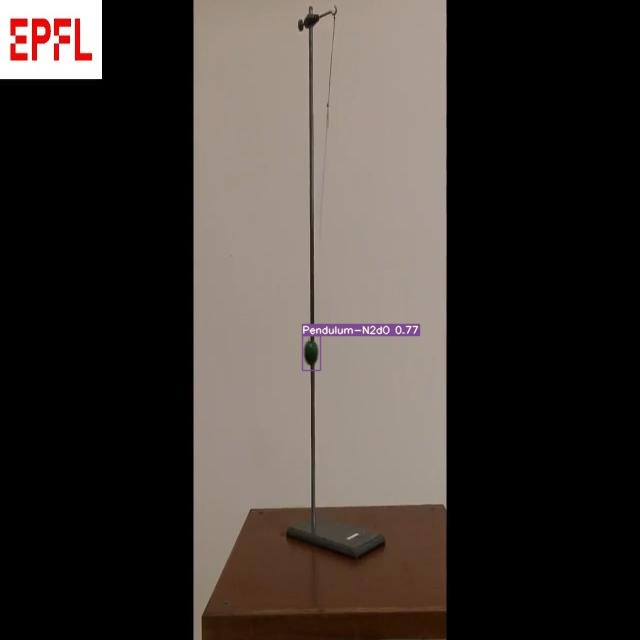

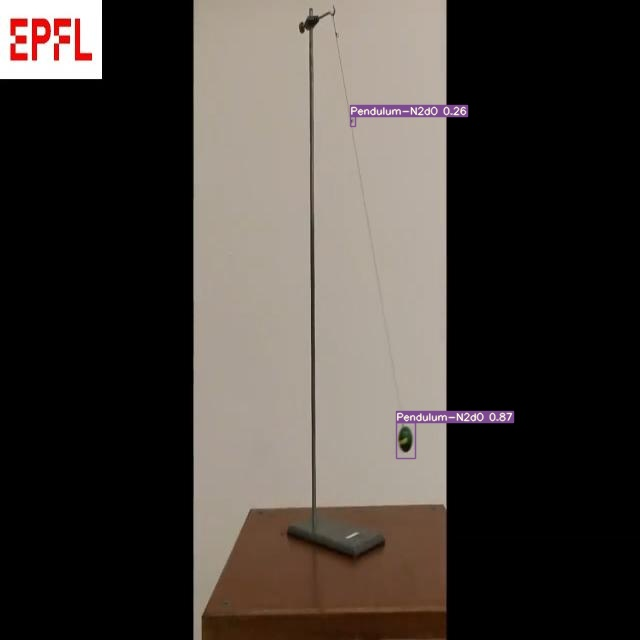

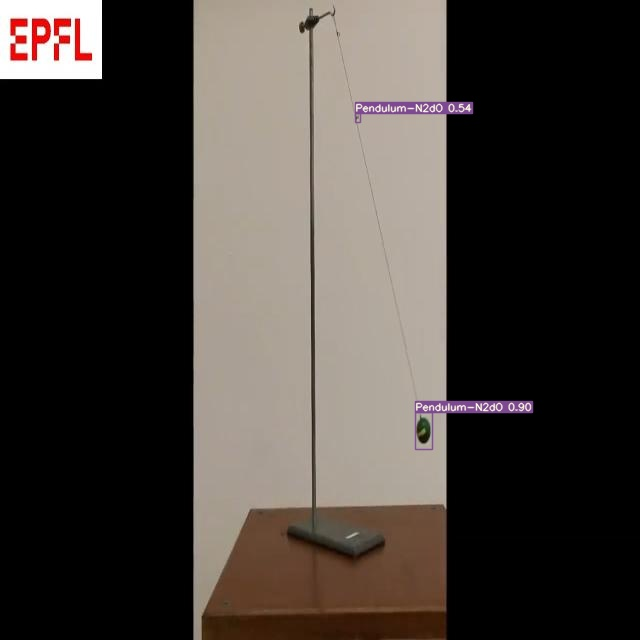

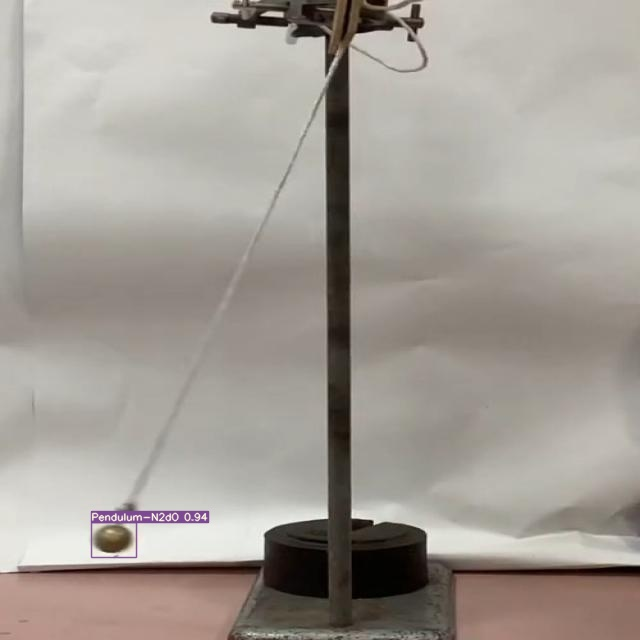

In [ ]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

i = 0
limit = 10000 # max images to print
for imageName in glob.glob('/content/gdrive/MyDrive/yolov7/runs/detect/exp4/*.jpg'):
    #Assuming JPG
    if i < limit:
      #image = Image.open(imageName)
      #width, height = image.size
      #print("Image size:", width, "x", height)
      image = Image(filename=imageName)
      width = image.width
      height = image.height

      display(image)

    i = i + 1

display(Image("/content/gdrive/MyDrive/yolov7/runs/detect/exp4/Simple-Pendulum_mp4-0002_jpg.rf.2243caa0b2d6b2bedccb279303df4009.jpg", width=400, height=400))


# **5.2 Now it's time to Infer on Custom Images**




## 5.2.1 Helper Code For Inference


In [ ]:
import os
import sys
sys.path.append('/content/gdrive/MyDrive/yolov7')


import argparse
import time
from pathlib import Path
import cv2
import torch
import numpy as np
import torch.backends.cudnn as cudnn
from numpy import random

from models.experimental import attempt_load
from utils.datasets import LoadStreams, LoadImages
from utils.general import check_img_size, check_requirements, check_imshow, non_max_suppression, apply_classifier, \
    scale_coords, xyxy2xywh, strip_optimizer, set_logging, increment_path
from utils.plots import plot_one_box
from utils.torch_utils import select_device, load_classifier, time_synchronized, TracedModel


def letterbox(img, new_shape=(640, 640), color=(114, 114, 114), auto=True, scaleFill=False, scaleup=True, stride=32):
    # Resize and pad image while meeting stride-multiple constraints
    shape = img.shape[:2]  # current shape [height, width]
    if isinstance(new_shape, int):
        new_shape = (new_shape, new_shape)

    # Scale ratio (new / old)
    r = min(new_shape[0] / shape[0], new_shape[1] / shape[1])
    if not scaleup:  # only scale down, do not scale up (for better test mAP)
        r = min(r, 1.0)

    # Compute padding
    ratio = r, r  # width, height ratios
    new_unpad = int(round(shape[1] * r)), int(round(shape[0] * r))
    dw, dh = new_shape[1] - new_unpad[0], new_shape[0] - new_unpad[1]  # wh padding
    if auto:  # minimum rectangle
        dw, dh = np.mod(dw, stride), np.mod(dh, stride)  # wh padding
    elif scaleFill:  # stretch
        dw, dh = 0.0, 0.0
        new_unpad = (new_shape[1], new_shape[0])
        ratio = new_shape[1] / shape[1], new_shape[0] / shape[0]  # width, height ratios

    dw /= 2  # divide padding into 2 sides
    dh /= 2

    if shape[::-1] != new_unpad:  # resize
        img = cv2.resize(img, new_unpad, interpolation=cv2.INTER_LINEAR)
    top, bottom = int(round(dh - 0.1)), int(round(dh + 0.1))
    left, right = int(round(dw - 0.1)), int(round(dw + 0.1))
    img = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)  # add border
    return img, ratio, (dw, dh)

# 5.2.2 Configuration Parameters

Change the path of both **weights** and **yaml** file

**weights** will be in yolov7 main folder -> runs -> train and then select the appropriate weight

**yaml** yolov7 main folder -> Trash-5, there you will find yaml file

In [ ]:
classes_to_filter = None  #You can give list of classes to filter by name, Be happy you don't have to put class number. ['train','person' ]


opt  = {

    "weights": "/content/gdrive/MyDrive/yolov7/runs/train/exp8/weights/epoch_054.pt", # Path to weights file default weights are for nano model
    "yaml"   : "Trash-5/data.yaml",
    "img-size": 640, # default image size
    "conf-thres": 0.25, # confidence threshold for inference.
    "iou-thres" : 0.45, # NMS IoU threshold for inference.
    "device" : '0',  # device to run our model i.e. 0 or 0,1,2,3 or cpu
    "classes" : classes_to_filter  # list of classes to filter or None

}

# **5.3. Inference on Single Image**


In [ ]:
%cd /content/gdrive/MyDrive/yolov7
!gdown https://drive.google.com/uc?id=1c96hId8WNsOASKHcAxsQeM4N-N2wuwy9
#This does not work in Safari Browser

# Plus concise

In [ ]:
import os

def test_on_set_of_images(path_of_images) :

  # Path to your folder containing images
  folder_path = path_of_images

  # List all files in the folder
  files = os.listdir(folder_path)

  # Filter image files (assuming image extensions like .jpg, .png, .jpeg)
  image_files = [file for file in files if file.endswith(('.jpg', '.jpeg', '.png'))]

  liste_of_prediction= []

  for source_image_path in image_files :

    with torch.no_grad():
      weights, imgsz = opt['weights'], opt['img-size']
      set_logging()
    device = select_device(opt['device'])
    half = device.type != 'cpu'
    model = attempt_load(weights, map_location=device)  # load FP32 model
    stride = int(model.stride.max())  # model stride
    imgsz = check_img_size(imgsz, s=stride)  # check img_size
    if half:
      model.half()

    names = model.module.names if hasattr(model, 'module') else model.names
    colors = [[random.randint(0, 255) for _ in range(3)] for _ in names]
    if device.type != 'cpu':
      model(torch.zeros(1, 3, imgsz, imgsz).to(device).type_as(next(model.parameters())))

    img0 = cv2.imread(source_image_path)
    img = letterbox(img0, imgsz, stride=stride)[0]
    img = img[:, :, ::-1].transpose(2, 0, 1)  # BGR to RGB, to 3x416x416
    img = np.ascontiguousarray(img)
    img = torch.from_numpy(img).to(device)
    img = img.half() if half else img.float()  # uint8 to fp16/32
    img /= 255.0  # 0 - 255 to 0.0 - 1.0
    if img.ndimension() == 3:
      img = img.unsqueeze(0)

    # Inference
    t1 = time_synchronized()
    pred = model(img, augment= False)[0]


    # Apply NMS
    classes = None
    if opt['classes']:
      classes = []
      for class_name in opt['classes']:
        classes.append(opt['classes'].index(class_name))


    pred = non_max_suppression(pred, opt['conf-thres'], opt['iou-thres'], classes= classes, agnostic= False)
    t2 = time_synchronized()
    for i, det in enumerate(pred):
      s = ''
      s += '%gx%g ' % img.shape[2:]  # print string
      gn = torch.tensor(img0.shape)[[1, 0, 1, 0]]
      if len(det):
        det[:, :4] = scale_coords(img.shape[2:], det[:, :4], img0.shape).round()

        for c in det[:, -1].unique():
          n = (det[:, -1] == c).sum()  # detections per class
          s += f"{n} {names[int(c)]}{'s' * (n > 1)}, "  # add to string

        for *xyxy, conf, cls in reversed(det):

          label = f'{names[int(cls)]} {conf:.2f}'
          plot_one_box(xyxy, img0, label=label, color=colors[int(cls)], line_thickness=3)
  liste_of_prediction.append(pred)
  return liste_of_prediction

In [ ]:
liste_of_prediction = test_on_set_of_images(path_of_images)

In [ ]:
source_image_path = '/content/gdrive/MyDrive/yolov7/ccprime-2/valid/images/yt-02w9lSii_Hs-0019_jpg.rf.5171c162c0fe22145b60c41acd046c3a.jpg'
#Change the Path Name to your file name.

In [ ]:
# Give path of source image.
#%cd /content/gdrive/MyDrive/yolov7
#source_image_path = '/content/trash.png'

with torch.no_grad():
  weights, imgsz = opt['weights'], opt['img-size']
  set_logging()
  device = select_device(opt['device'])
  half = device.type != 'cpu'
  model = attempt_load(weights, map_location=device)  # load FP32 model
  stride = int(model.stride.max())  # model stride
  imgsz = check_img_size(imgsz, s=stride)  # check img_size
  if half:
    model.half()

  names = model.module.names if hasattr(model, 'module') else model.names
  colors = [[random.randint(0, 255) for _ in range(3)] for _ in names]
  if device.type != 'cpu':
    model(torch.zeros(1, 3, imgsz, imgsz).to(device).type_as(next(model.parameters())))

  img0 = cv2.imread(source_image_path)
  img = letterbox(img0, imgsz, stride=stride)[0]
  img = img[:, :, ::-1].transpose(2, 0, 1)  # BGR to RGB, to 3x416x416
  img = np.ascontiguousarray(img)
  img = torch.from_numpy(img).to(device)
  img = img.half() if half else img.float()  # uint8 to fp16/32
  img /= 255.0  # 0 - 255 to 0.0 - 1.0
  if img.ndimension() == 3:
    img = img.unsqueeze(0)

  # Inference
  t1 = time_synchronized()
  pred = model(img, augment= False)[0]


  # Apply NMS
  classes = None
  if opt['classes']:
    classes = []
    for class_name in opt['classes']:

      classes.append(opt['classes'].index(class_name))


  pred = non_max_suppression(pred, opt['conf-thres'], opt['iou-thres'], classes= classes, agnostic= False)
  t2 = time_synchronized()
  for i, det in enumerate(pred):
    s = ''
    s += '%gx%g ' % img.shape[2:]  # print string
    gn = torch.tensor(img0.shape)[[1, 0, 1, 0]]
    if len(det):
      det[:, :4] = scale_coords(img.shape[2:], det[:, :4], img0.shape).round()

      for c in det[:, -1].unique():
        n = (det[:, -1] == c).sum()  # detections per class
        s += f"{n} {names[int(c)]}{'s' * (n > 1)}, "  # add to string

      for *xyxy, conf, cls in reversed(det):

        label = f'{names[int(cls)]} {conf:.2f}'
        plot_one_box(xyxy, img0, label=label, color=colors[int(cls)], line_thickness=3)



AssertionError: CUDA unavailable, invalid device 0 requested

In [ ]:
print(img0.shape)

(640, 640, 3)


In [ ]:
print(pred)

[tensor([[376.00000, 489.00000, 389.00000, 518.00000,   0.94482,   0.00000]], device='cuda:0')]


Prediction structure :

image.png

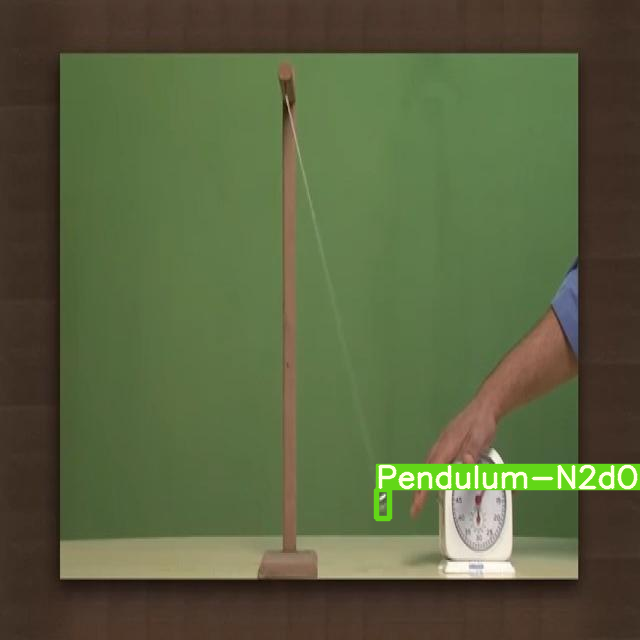

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img0)

# **6. Inference on Video**

**Note** Make sure to make relevant changes in arguments in argument section

In [ ]:
%cd /content/gdrive/MyDrive/yolov7
from google.colab import files
uploaded = files.upload()

# 6.1.4 Enter Video Path

In [ ]:
#give the full path to video, your video will be in the Yolov7 folder
video_path = '/content/gdrive/MyDrive/yolov7/Simple Pendulum.mp4'

# 6.2 YOLOv7 Inference on Video

In [ ]:
predictions=[]
centers=[]
time=[]
theta=[]

In [ ]:
# Initializing video object
video = cv2.VideoCapture(video_path)


#Video information
fps = video.get(cv2.CAP_PROP_FPS)
w = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
nframes = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

# Initialzing object for writing video output
output = cv2.VideoWriter('output.mp4', cv2.VideoWriter_fourcc(*'DIVX'),fps , (w,h))
torch.cuda.empty_cache()
# Initializing model and setting it for inference
with torch.no_grad():
  weights, imgsz = opt['weights'], opt['img-size']
  set_logging()
  device = select_device(opt['device'])
  half = device.type != 'cpu'
  model = attempt_load(weights, map_location=device)  # load FP32 model
  stride = int(model.stride.max())  # model stride
  imgsz = check_img_size(imgsz, s=stride)  # check img_size
  if half:
    model.half()

  names = model.module.names if hasattr(model, 'module') else model.names
  colors = [[random.randint(0, 255) for _ in range(3)] for _ in names]
  if device.type != 'cpu':
    model(torch.zeros(1, 3, imgsz, imgsz).to(device).type_as(next(model.parameters())))

  classes = None
  if opt['classes']:
    classes = []
    for class_name in opt['classes']:
      classes.append(opt['classes'].index(class_name))

  for j in range(nframes):

      ret, img0 = video.read()
      if ret:
        img = letterbox(img0, imgsz, stride=stride)[0]
        img = img[:, :, ::-1].transpose(2, 0, 1)  # BGR to RGB, to 3x416x416
        img = np.ascontiguousarray(img)
        img = torch.from_numpy(img).to(device)
        img = img.half() if half else img.float()  # uint8 to fp16/32
        img /= 255.0  # 0 - 255 to 0.0 - 1.0
        if img.ndimension() == 3:
          img = img.unsqueeze(0)

        # Inference
        t1 = time_synchronized()
        pred = model(img, augment= False)[0]

        pred = non_max_suppression(pred, opt['conf-thres'], opt['iou-thres'], classes= classes, agnostic= False)
        predictions.append(pred)
        print(pred)
        t2 = time_synchronized()
        for i, det in enumerate(pred):
          s = ''
          s += '%gx%g ' % img.shape[2:]  # print string
          gn = torch.tensor(img0.shape)[[1, 0, 1, 0]]
          if len(det):
            det[:, :4] = scale_coords(img.shape[2:], det[:, :4], img0.shape).round()

            for c in det[:, -1].unique():
              n = (det[:, -1] == c).sum()  # detections per class
              s += f"{n} {names[int(c)]}{'s' * (n > 1)}, "  # add to string

            for *xyxy, conf, cls in reversed(det):

              label = f'{names[int(cls)]} {conf:.2f}'
              plot_one_box(xyxy, img0, label=label, color=colors[int(cls)], line_thickness=3)

        print(f"{j+1}/{nframes} frames processed")
        output.write(img0)
      else:
        break


output.release()
video.release()

In [ ]:
def get_video_duration(video_path):
    video = cv2.VideoCapture(video_path)
    fps = video.get(cv2.CAP_PROP_FPS)
    total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    duration_seconds = total_frames / fps
    video.release()
    return duration_seconds


In [ ]:
def calculate_center(bbox):

    x_min = bbox[0].cpu().numpy()[0][0]
    y_min = bbox[0].cpu().numpy()[0][1]
    x_max = bbox[0].cpu().numpy()[0][2]
    y_max = bbox[0].cpu().numpy()[0][3]

    center_x = (x_min + x_max) / 2

    center_y = (y_min + y_max) / 2
    return center_x, center_y

In [ ]:
# calcule de pas

In [ ]:
duration =get_video_duration('/content/gdrive/MyDrive/yolov7/Simple Pendulum.mp4')

h=duration/len(predictions)
c=0

for el in predictions:
  if str(el) == "[tensor([], device='cuda:0', size=(0, 6))]" :
    continue

  else :
    centers.append(calculate_center(el))
    time.append(c)

  c+=h



In [ ]:
print(len(centers))
print(len(time))
print(len(theta))

702
702
0


In [ ]:
import numpy as np
from scipy.optimize import least_squares

def fit_circle_residuals(params, points):
    """
    Residuals function for the least squares fitting of a circle to the points.
    params: parameters of the circle (xc, yc, R)
    points: list of (x, y) points
    """
    xc, yc, R = params
    residuals = np.sqrt((points[:, 0] - xc)**2 + (points[:, 1] - yc)**2) - R
    return residuals

def center_of_rotation(points):
    """
    Calculate the center of rotation for n points using the least squares fitting of a circle.
    points: list of (x, y) points
    """
    points_array = np.array(points)

    # Initial guess for the parameters (xc, yc, R)
    xc_initial = np.mean(points_array[:, 0])
    yc_initial = np.mean(points_array[:, 1])
    R_initial = np.max(np.sqrt((points_array[:, 0] - xc_initial)**2 + (points_array[:, 1] - yc_initial)**2))
    params_initial = np.array([xc_initial, yc_initial, R_initial])

    # Fitting the circle using least squares
    result = least_squares(fit_circle_residuals, params_initial, args=(points_array,))

    # Extracting the center of the fitted circle
    xc, yc, _ = result.x

    return xc, yc

# Example usage:
points_list = [(0, 0), (1, 1), (2, 0), (3, 2), (4, 1)]

center = center_of_rotation(centers)
print("Center of rotation:", center)


Center of rotation: (269.2946872681899, 103.80118876315335)


In [ ]:
import math

In [ ]:
def calculate_theta(x, y):
    # Define the origin (0, 0) as the reference point
    origin_x, origin_y = (121,342)
    # Calculate the vector from the origin to the ball's position
    dx = x - origin_x
    dy = y - origin_y

    # Calculate the angle theta using arctan2
    theta = math.atan2(dy, dx)

    # Convert theta to degrees if needed
    theta_degrees = np.degrees(theta)

    return theta

In [ ]:
theta = []
for el in centers :
  x,y = el
  angle = calculate_theta(x,y)
  theta.append(angle)

In [ ]:
print(centers)
print(time)
print(theta)
print(len(theta))
print(theta[25])

[(265.0, 639.0), (265.0, 639.0), (265.0, 639.5), (265.0, 640.0), (264.0, 641.0), (264.5, 641.0), (264.5, 642.0), (265.0, 642.0), (265.0, 642.0), (265.5, 642.0), (266.0, 642.0), (266.5, 643.0), (267.0, 643.0), (267.0, 643.0), (267.0, 643.0), (267.5, 642.5), (268.0, 642.5), (268.5, 642.5), (268.5, 642.5), (268.5, 642.0), (268.0, 641.0), (268.0, 641.0), (267.5, 642.0), (266.0, 641.0), (267.0, 640.5), (350.5, 633.0), (418.0, 616.5), (396.0, 622.5), (369.0, 628.5), (339.5, 632.5), (307.5, 636.5), (272.0, 637.0), (237.5, 636.0), (206.5, 633.0), (174.5, 629.0), (146.5, 621.0), (121.5, 615.0), (103.0, 610.5), (88.0, 605.0), (80.0, 603.5), (76.0, 603.0), (79.0, 603.5), (86.5, 608.0), (100.0, 612.0), (119.0, 618.0), (143.5, 625.0), (172.0, 630.0), (202.5, 635.0), (235.5, 639.5), (269.0, 641.0), (304.0, 640.5), (337.5, 636.5), (366.0, 629.5), (393.5, 626.0), (417.0, 619.5), (434.5, 614.5), (446.5, 609.5), (453.5, 608.0), (455.0, 608.0), (451.5, 609.0), (441.0, 611.5), (427.0, 615.5), (406.0, 620.

In [ ]:
theta_prime=[]

In [ ]:
for el in theta:
  theta_prime.append(el-88.87785503369692)

print(theta_prime)

[9.92091236741706, 9.92091236741706, 9.91210128859619, 9.903307700688558, 9.999258805305487, 9.942524518324149, 9.92494942589407, 9.8683072288583, 9.8683072288583, 9.811647797025586, 9.754971233394684, 9.681208978411647, 9.624607980493053, 9.624607980493053, 9.624607980493053, 9.576406687843601, 9.519717541021592, 9.463011829234958, 9.463011829234958, 9.471335056914526, 9.544901991943888, 9.544901991943888, 9.584839784640067, 9.772217431060113, 9.667132125679444, 0.0, -8.211222277045621, -5.489588725291355, -2.212859468016248, 1.2995307138353525, 5.0451914003754155, 9.153801060786819, 13.096575066878174, 16.621881264389287, 20.215636966788708, 23.474858482700512, 26.296674389055823, 28.352250558823854, 30.09151925912937, 30.934711736204576, 31.339418923687404, 31.0293176630758, 30.076183828166194, 28.569354002041152, 26.405404630998262, 23.61395578907903, 20.443954526696743, 16.997592174953795, 13.236803320567333, 9.43114358118622, 5.418528593846162, 1.5326501801449552, -1.850044891997

In [ ]:
import math

# Function to convert degrees to radians
def degrees_to_radians(degrees):
    return degrees * math.pi / 180.0

# Convert each angle from degrees to radians
vectors_radians = [degrees_to_radians(theta) for theta in theta_prime]

# Print the list of angles in radians
print(vectors_radians)


[0.17315258561325308, 0.17315258561325308, 0.1729988032771762, 0.17284532621512444, 0.17451998891161538, 0.17352978880501968, 0.17322304557577248, 0.17223445274193488, 0.17223445274193488, 0.17124555910414477, 0.17025636646006947, 0.16896897224691987, 0.16798109847332596, 0.16798109847332596, 0.16798109847332596, 0.16713982721287565, 0.16615041495068514, 0.16516071357532142, 0.16516071357532142, 0.165305981302723, 0.16658996653958613, 0.16658996653958613, 0.16728701251811337, 0.17055736939278096, 0.16872328481842455, 0.0, -0.14331286434755208, -0.09581139783669265, -0.03862168360081368, 0.022681089687219127, 0.08805520132985448, 0.1597639675832796, 0.22857835565162068, 0.29010655593915113, 0.3528294254583425, 0.40971357196284425, 0.4589635504138924, 0.4948401226018785, 0.5251960879990922, 0.5399125729521014, 0.5469760458801627, 0.5415637578679052, 0.5249284342365725, 0.4986292925034369, 0.460861251132278, 0.4121412779398047, 0.35681431861885715, 0.2966639483641677, 0.2310258003828184, 

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(time, theta)
plt.show()

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/gdrive/MyDrive/yolov7/output.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

# 6.3 Download Inference Video

In [ ]:
from google.colab import files
save_path = '/content/gdrive/MyDrive/yolov7/output.mp4'
files.download(save_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>